### Importación de datos



In [84]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [64]:
type(tienda)

pandas.core.frame.DataFrame

In [85]:
def calcula_ingresos(lista) -> float:
  precio_suma = 0
  precio_suma = sum(lista['Precio'])
  return precio_suma

ingreso_tienda1= calcula_ingresos(tienda)
ingreso_tienda2= calcula_ingresos(tienda2)
ingreso_tienda3= calcula_ingresos(tienda3)
ingreso_tienda4= calcula_ingresos(tienda4)

ventas_tienda=[]
ventas_tienda.append(['Tienda 1',round(ingreso_tienda1,None)])
ventas_tienda.append(['Tienda 2',round(ingreso_tienda2,None)])
ventas_tienda.append(['Tienda 3',round(ingreso_tienda3,None)])
ventas_tienda.append(['Tienda 4',round(ingreso_tienda4,None)])

print(f'Las ventas totales son { str(ventas_tienda)}')



Las ventas totales son [['Tienda 1', 1150880400], ['Tienda 2', 1116343500], ['Tienda 3', 1098019600], ['Tienda 4', 1038375700]]


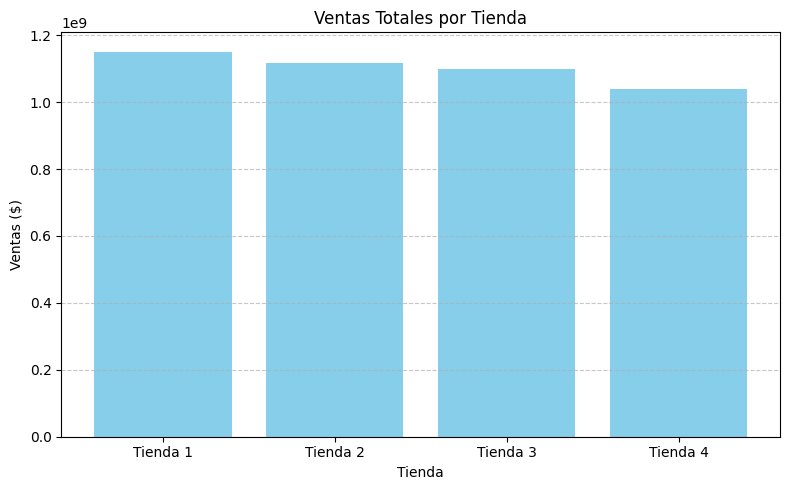

In [86]:
from matplotlib import pyplot as plt

tiendas = [tienda[0] for tienda in ventas_tienda]
ventas = [tienda[1] for tienda in ventas_tienda]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, ventas, color='skyblue')
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [87]:
totales_por_categoria = [['Tienda', 'Categoría', 'Cantidad']]

tiendas = [
    ('Tienda 1', tienda),
    ('Tienda 2', tienda2),
    ('Tienda 3', tienda3),
    ('Tienda 4', tienda4)
]

for nombre_tienda, datos_tienda in tiendas:
    cantidad_por_categoria = datos_tienda.groupby("Categoría del Producto").size().reset_index(name='Cantidad')

    for indice, fila in cantidad_por_categoria.iterrows():
        categoria = fila["Categoría del Producto"]
        cantidad = fila["Cantidad"]

        totales_por_categoria.append([nombre_tienda, categoria, cantidad])


print(f'Cantidad de productos vendidos por categoría:\n{totales_por_categoria}')


Cantidad de productos vendidos por categoría:
[['Tienda', 'Categoría', 'Cantidad'], ['Tienda 1', 'Artículos para el hogar', 171], ['Tienda 1', 'Deportes y diversión', 284], ['Tienda 1', 'Electrodomésticos', 312], ['Tienda 1', 'Electrónicos', 448], ['Tienda 1', 'Instrumentos musicales', 182], ['Tienda 1', 'Juguetes', 324], ['Tienda 1', 'Libros', 173], ['Tienda 1', 'Muebles', 465], ['Tienda 2', 'Artículos para el hogar', 181], ['Tienda 2', 'Deportes y diversión', 275], ['Tienda 2', 'Electrodomésticos', 305], ['Tienda 2', 'Electrónicos', 422], ['Tienda 2', 'Instrumentos musicales', 224], ['Tienda 2', 'Juguetes', 313], ['Tienda 2', 'Libros', 197], ['Tienda 2', 'Muebles', 442], ['Tienda 3', 'Artículos para el hogar', 177], ['Tienda 3', 'Deportes y diversión', 277], ['Tienda 3', 'Electrodomésticos', 278], ['Tienda 3', 'Electrónicos', 451], ['Tienda 3', 'Instrumentos musicales', 177], ['Tienda 3', 'Juguetes', 315], ['Tienda 3', 'Libros', 185], ['Tienda 3', 'Muebles', 499], ['Tienda 4', 'Artíc

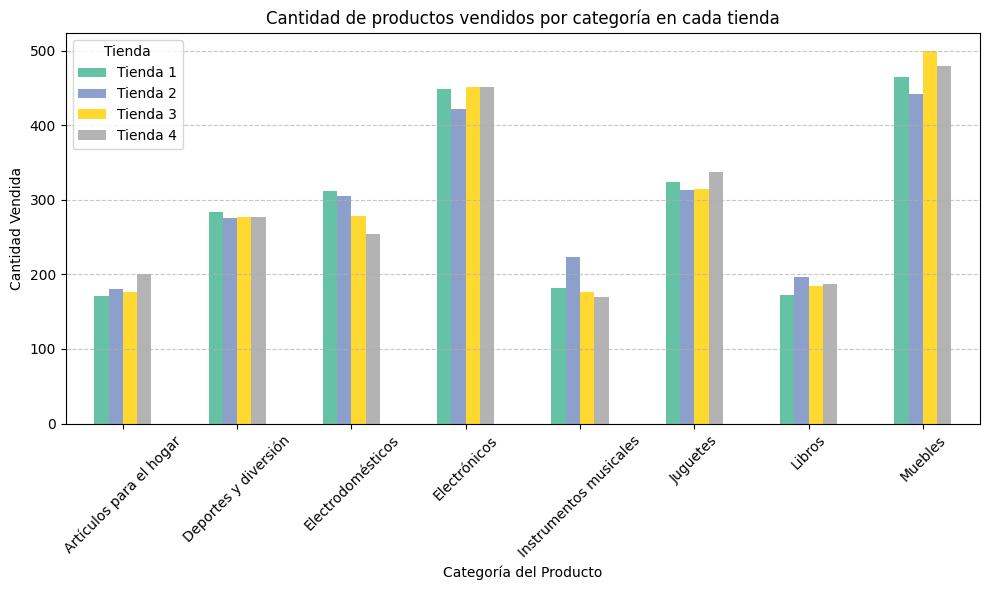

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

df_totales = pd.DataFrame(totales_por_categoria[1:], columns=totales_por_categoria[0])

df_totales['Cantidad'] = pd.to_numeric(df_totales['Cantidad'], errors='coerce')

pivot = df_totales.pivot(index='Categoría', columns='Tienda', values='Cantidad').fillna(0)
pivot.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title('Cantidad de productos vendidos por categoría en cada tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [89]:
calificaciones_promedio = []

def calificacion_tienda(lista) -> float:
  calificacion_suma = 0
  calificacion_suma = sum(lista['Calificación']) / len(lista['Calificación'])
  return calificacion_suma

calificaciones_promedio.append(['Tienda1',round(calificacion_tienda(tienda),1)])
calificaciones_promedio.append(['Tienda2',round(calificacion_tienda(tienda2),1)])
calificaciones_promedio.append(['Tienda3',round(calificacion_tienda(tienda3),1)])
calificaciones_promedio.append(['Tienda4',round(calificacion_tienda(tienda4),1)])

print(f'Las calificaciones promedio son { str(calificaciones_promedio)}')





Las calificaciones promedio son [['Tienda1', 4.0], ['Tienda2', 4.0], ['Tienda3', 4.0], ['Tienda4', 4.0]]


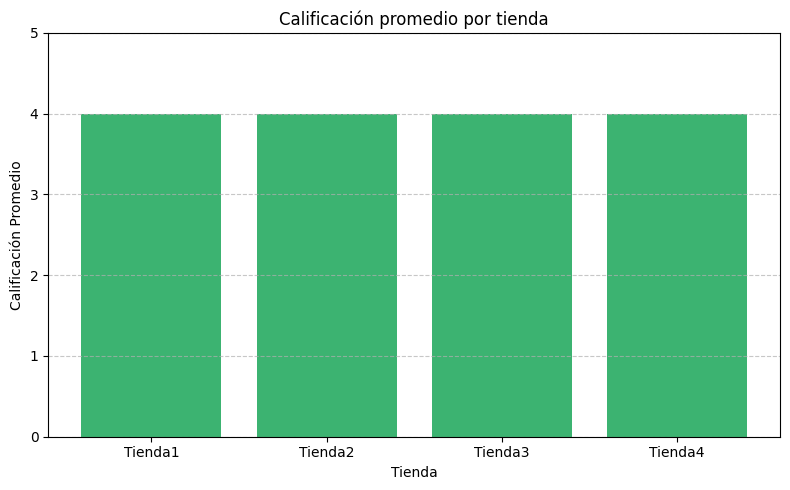

In [95]:
import matplotlib.pyplot as plt

nombres_tiendas = [item[0] for item in calificaciones_promedio]
calificaciones = [item[1] for item in calificaciones_promedio]

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, calificaciones, color='mediumseagreen')

plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [91]:
Tiendas = [
    ('Tienda 1', tienda),
    ('Tienda 2', tienda2),
    ('Tienda 3', tienda3),
    ('Tienda 4', tienda4)
]

detalle_ventas = []

for nombre_tienda, datos_tienda in Tiendas:
    conteo_productos = datos_tienda.groupby("Producto").size().reset_index(name="Cantidad Vendida")

    cantidad_maxima = conteo_productos["Cantidad Vendida"].max()
    cantidad_minima = conteo_productos["Cantidad Vendida"].min()

    productos_mas_vendidos = conteo_productos[conteo_productos["Cantidad Vendida"] == cantidad_maxima]
    productos_menos_vendidos = conteo_productos[conteo_productos["Cantidad Vendida"] == cantidad_minima]

    for i, fila_producto in productos_mas_vendidos.iterrows():
        detalle_ventas.append([
            nombre_tienda,
            fila_producto["Producto"],
            fila_producto["Cantidad Vendida"],
            "Más vendido"
        ])

    for i, fila_producto in productos_menos_vendidos.iterrows():
        detalle_ventas.append([
            nombre_tienda,
            fila_producto["Producto"],
            fila_producto["Cantidad Vendida"],
            "Menos vendido"
        ])

print("productos más y menos vendidos por tienda:")
for fila in detalle_ventas:
    print(f"Tienda: {fila[0]} | Producto: {fila[1]} | Cantidad: {fila[2]} | Tipo: {fila[3]}")

productos más y menos vendidos por tienda:
Tienda: Tienda 1 | Producto: Armario | Cantidad: 60 | Tipo: Más vendido
Tienda: Tienda 1 | Producto: Microondas | Cantidad: 60 | Tipo: Más vendido
Tienda: Tienda 1 | Producto: TV LED UHD 4K | Cantidad: 60 | Tipo: Más vendido
Tienda: Tienda 1 | Producto: Auriculares con micrófono | Cantidad: 33 | Tipo: Menos vendido
Tienda: Tienda 1 | Producto: Celular ABXY | Cantidad: 33 | Tipo: Menos vendido
Tienda: Tienda 2 | Producto: Iniciando en programación | Cantidad: 65 | Tipo: Más vendido
Tienda: Tienda 2 | Producto: Juego de mesa | Cantidad: 32 | Tipo: Menos vendido
Tienda: Tienda 3 | Producto: Kit de bancas | Cantidad: 57 | Tipo: Más vendido
Tienda: Tienda 3 | Producto: Bloques de construcción | Cantidad: 35 | Tipo: Menos vendido
Tienda: Tienda 4 | Producto: Cama box | Cantidad: 62 | Tipo: Más vendido
Tienda: Tienda 4 | Producto: Guitarra eléctrica | Cantidad: 33 | Tipo: Menos vendido


# 5. Envío promedio por tienda

In [78]:
Tiendas = [
    ('Tienda 1', tienda),
    ('Tienda 2', tienda2),
    ('Tienda 3', tienda3),
    ('Tienda 4', tienda4)
]

promedio_envio_por_tienda = []

for nombre_tienda, datos_tienda in Tiendas:
    if not isinstance(datos_tienda, pd.DataFrame):
        continue

    promedio_envio = datos_tienda["Costo de envío"].mean()
    promedio_envio_por_tienda.append([nombre_tienda, round(promedio_envio, 2)])

print("Costo de envío promedio de cada tienda:")
for tienda, promedio in promedio_envio_por_tienda:
    print(f"{tienda}: {promedio}")


Costo de envío promedio de cada tienda:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


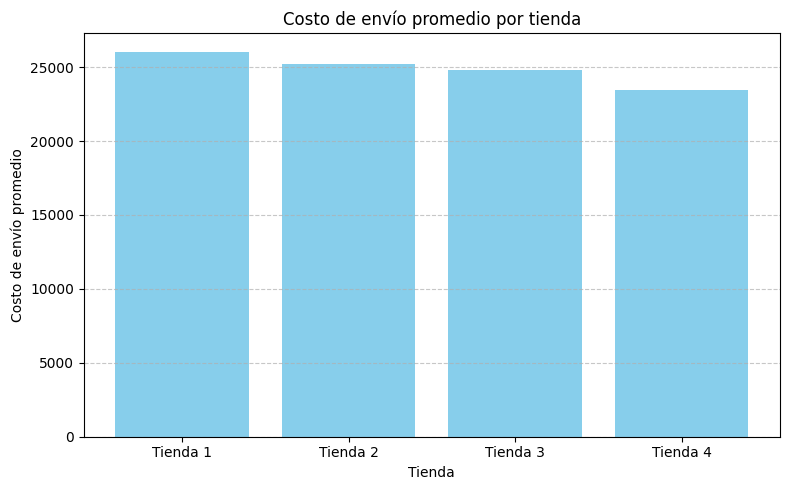

In [97]:
import matplotlib.pyplot as plt

tiendas = [item[0] for item in promedio_envio_por_tienda]
promedios = [item[1] for item in promedio_envio_por_tienda]

plt.figure(figsize=(8,5))
plt.bar(tiendas, promedios, color='skyblue')

plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**Analisis Final**

Segun lo revisado en cada analisis podemos detallar lo siguiente:



**Analisis de Ingresos Totales::**
Segun el resultado podemos ver claramente que la **Tienda1** es la que tiene el mayor total en la suma de sus ingresos, por lo demostrado en el siguiente grafico.

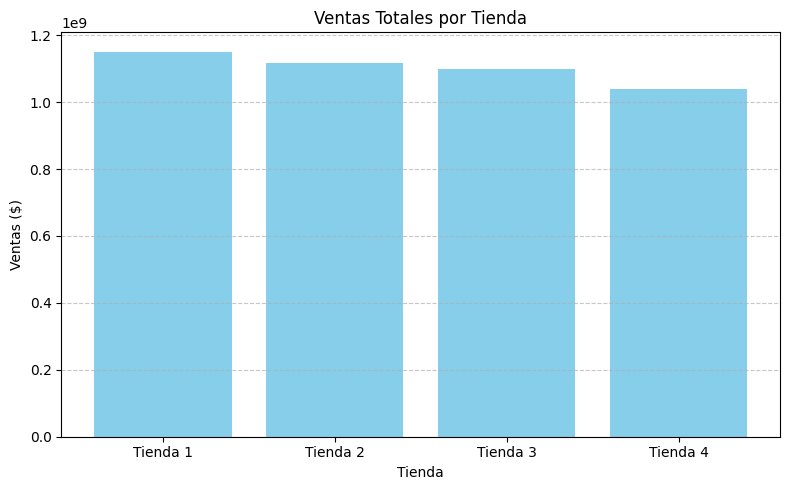

In [100]:
from matplotlib import pyplot as plt

tiendas = [tienda[0] for tienda in ventas_tienda]
ventas = [tienda[1] for tienda in ventas_tienda]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, ventas, color='skyblue')
plt.title('Ventas Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analisis de Categorias de Productos::**
Segun el resultado podemos ver los productos de las Categorias **Muebles**, seguido por los **Electronicos**, son las que mas ventas tienen en todas las tiendas evaluadas, demostrado segun el siguiente grafico.

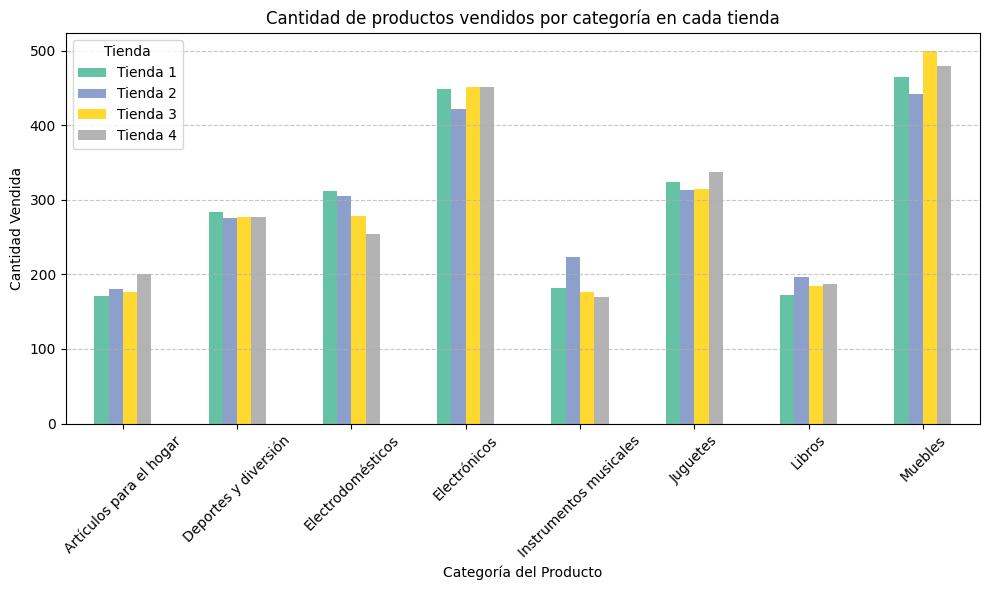

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

df_totales = pd.DataFrame(totales_por_categoria[1:], columns=totales_por_categoria[0])

df_totales['Cantidad'] = pd.to_numeric(df_totales['Cantidad'], errors='coerce')

pivot = df_totales.pivot(index='Categoría', columns='Tienda', values='Cantidad').fillna(0)
pivot.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title('Cantidad de productos vendidos por categoría en cada tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

**Analisis de Calificaciones::**
Segun el resultado todas las tiendas tienen el mismo promedio de calificaciones, por lo que es un dato irrelevante para evaluar diferencias en las tiendas, no obsante el dato de 4 de 5 es un promedio total considerado bueno. Se puede ver el siguiente grafico.

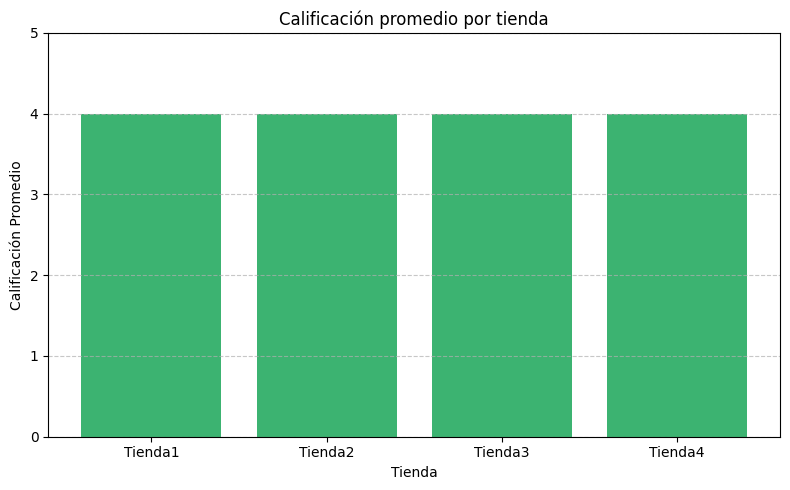

In [102]:
import matplotlib.pyplot as plt

nombres_tiendas = [item[0] for item in calificaciones_promedio]
calificaciones = [item[1] for item in calificaciones_promedio]

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, calificaciones, color='mediumseagreen')

plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analisis de Productos mas y menos Vendidos**:: Segun el resultado, los Productos mas vendidos de la tienda 1 coinciden tres en cantidad (Armario, Microondas, TV LED) y los menos vendidos (Auriculares, Celular ABXY), para la tienda 2 lo mas vendido es (Iniciando Programación) y menos vendido (Juego de Mesa), de la tienda 3 lo mas vendido (Kit de bancas) y menos vendido (Bloques de Construcción), y de la Tienda 4 lo mas vendido (Cama Box) y menos vendido (Guitarra Electrica). Se puede ver la siguiente lista detalle.

In [ ]:
Tienda: Tienda 1 | Producto: Armario | Cantidad: 60 | Tipo: Más vendido
Tienda: Tienda 1 | Producto: Microondas | Cantidad: 60 | Tipo: Más vendido
Tienda: Tienda 1 | Producto: TV LED UHD 4K | Cantidad: 60 | Tipo: Más vendido
Tienda: Tienda 1 | Producto: Auriculares con micrófono | Cantidad: 33 | Tipo: Menos vendido
Tienda: Tienda 1 | Producto: Celular ABXY | Cantidad: 33 | Tipo: Menos vendido
Tienda: Tienda 2 | Producto: Iniciando en programación | Cantidad: 65 | Tipo: Más vendido
Tienda: Tienda 2 | Producto: Juego de mesa | Cantidad: 32 | Tipo: Menos vendido
Tienda: Tienda 3 | Producto: Kit de bancas | Cantidad: 57 | Tipo: Más vendido
Tienda: Tienda 3 | Producto: Bloques de construcción | Cantidad: 35 | Tipo: Menos vendido
Tienda: Tienda 4 | Producto: Cama box | Cantidad: 62 | Tipo: Más vendido
Tienda: Tienda 4 | Producto: Guitarra eléctrica | Cantidad: 33 | Tipo: Menos vendido

**Analisis de Coste envio promedio::**
Segun el resultado podemos ver claramente que la **Tienda1** es la que tiene el mayor promedio en sus costos de envio, por lo demostrado en el siguiente grafico.

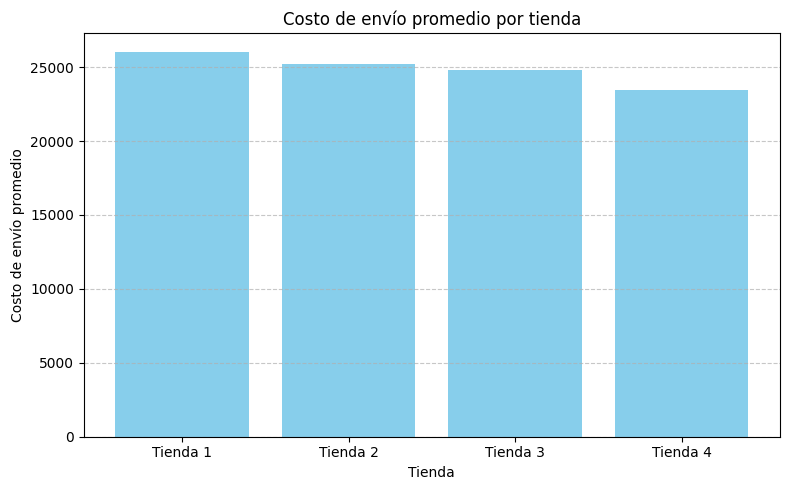

In [105]:
import matplotlib.pyplot as plt

tiendas = [item[0] for item in promedio_envio_por_tienda]
promedios = [item[1] for item in promedio_envio_por_tienda]

plt.figure(figsize=(8,5))
plt.bar(tiendas, promedios, color='skyblue')

plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Conclusión**:
Finalmente la tienda que posee mas ingresos y que recauda mas en costos de envio es claramente la Tienda 1, demas 3 productos de su cartera estan a la par de los considerados los mas vendidos, y tambien la categoria, lamentablemente la tienda 4 es la que posee menos ingresos y menos gastos de envio asociados, entiendose que los gastos de envio se consideran tambien ingresos para la compañia, por ende la **empresa mas debil, entendiendo aquella que se debe vender seria la Tienda 4**